<a href="https://colab.research.google.com/github/raquel-maia/python-dados/blob/main/atividade_desafio_Produtos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.stats import norm, ttest_1samp, ttest_ind
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Suponha que você trabalha em uma empresa do ramo de cosméticos ou beleza. O
Time de produtos dessa empresa está interessado criar novos batons com maior
durabilidade. Para isso estão testando 3 diferentes fórmulas para irem a mercado.

Com isso, a empresa fez uma pesquisa com varias voluntárias e populou a base de
dados (desafio_01_cosmeticos.csv) contendo as seguintes informacoes:

● id_produto: código identificador do produto, com a fórmula utilizada. Para
diferenciarmos se se trata do batom com a fórmula 1, 2 ou 3

● id_voluntária: código identificador da voluntária que utilizou o produto.

● durabilidade: quanto tempo o produto durou em horas.

● idade: idade da voluntária

● exposicao_sol:

variável que indica 1 se a voluntária se expos ao sol 0 caso
contrário.

De posse dessas informacoes, o time de produtos solicitou aos analistas de dados da empresa as seguintes perguntas a serem respondidas:

1 - Existe diferenca estatisticamente significativa na durabilidade dos batons com formulas diferentes?

2 - Essa diferenca persiste ou nao quando a voluntária se expoe ao sol? E com
relacao a idade?

3- Qual fórmula de batom voce indicaria para consumidores que buscam maior
durabilidade e exposicao ao sol?

In [ ]:
#teste de média , diferentes testes, quartis , distribuição

# Compreendendo os Dados

In [ ]:
cosmeticos_df = pd.read_csv('desafio_01_cosmeticos_challenge_testehipoteses.csv')

In [ ]:
cosmeticos_df.head(100)

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
0,1,1,12,40,1
1,2,2,5,36,0
2,1,3,19,47,0
3,1,4,14,36,1
4,1,5,17,46,1
...,...,...,...,...,...
95,1,96,10,46,1
96,1,97,11,46,1
97,1,98,15,48,0
98,1,99,18,32,0


In [ ]:
##dimensões

In [ ]:
#5 primeiras e últimas linhas e número de linhas e colunas
display(cosmeticos_df)

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
0,1,1,12,40,1
1,2,2,5,36,0
2,1,3,19,47,0
3,1,4,14,36,1
4,1,5,17,46,1
...,...,...,...,...,...
295,3,296,18,52,0
296,3,297,30,19,0
297,3,298,43,23,1
298,3,299,41,19,0


#Análise exploratória

In [ ]:
cosmeticos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id_produto     300 non-null    int64
 1   id_voluntária  300 non-null    int64
 2   durabilidade   300 non-null    int64
 3   idade          300 non-null    int64
 4   exposicao_sol  300 non-null    int64
dtypes: int64(5)
memory usage: 11.8 KB


In [ ]:
cosmeticos_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_produto,300.0,2.000000,0.817861,1.0,1.00,2.0,3.00,3.0
id_voluntária,300.0,150.500000,86.746758,1.0,75.75,150.5,225.25,300.0
durabilidade,300.0,17.133333,10.942945,5.0,9.00,14.0,20.00,48.0
idade,300.0,36.886667,12.625841,18.0,26.00,36.0,48.00,60.0
exposicao_sol,300.0,0.440000,0.497216,0.0,0.00,0.0,1.00,1.0


In [ ]:
# Calculando a amplitude e a variância
cosmeticos_desc = cosmeticos_df.describe().T
cosmeticos_desc['amplitude'] = cosmeticos_desc['max'] - cosmeticos_desc['min']
cosmeticos_desc['variância'] = cosmeticos_df.var()

print(cosmeticos_desc[['mean', 'std', 'min', 'max', 'amplitude', 'variância']])


                     mean        std   min    max  amplitude    variância
id_produto       2.000000   0.817861   1.0    3.0        2.0     0.668896
id_voluntária  150.500000  86.746758   1.0  300.0      299.0  7525.000000
durabilidade    17.133333  10.942945   5.0   48.0       43.0   119.748049
idade           36.886667  12.625841  18.0   60.0       42.0   159.411862
exposicao_sol    0.440000   0.497216   0.0    1.0        1.0     0.247224


No dados acima, consiguimos ver que a idade maxima das nossas volutárias é de 60 anos e a minima é de 18 anos, com media de 36 anos. com desvio padrão de 12, 62, ou seja

Durabilidade: A durabilidade média é de aproximadamente 17h, variando de 5 a 48 horas. Existe uma grande dispersão nos dados, com alguns produtos apresentando durabilidades muito superiores ou inferiores à média.

Idade: A idade média das voluntárias é de aproximadamente 37 anos, variando de 18 a 60 anos. Há uma distribuição relativamente uniforme das idades na amostra.

Exposição ao Sol: A exposição média ao sol é de 0,44. A maioria das voluntárias foi exposta ao sol, conforme indicado pela contagem.

id_produto e id_voluntária: Ambas as variáveis têm distribuições uniformes, com cada valor aparecendo aproximadamente o mesmo número de vezes.

1. Distribuição das **Variáveis**

Histogramas para visualizar a distribuição das variáveis contínuas: durabilidade, idade e exposicao_sol.




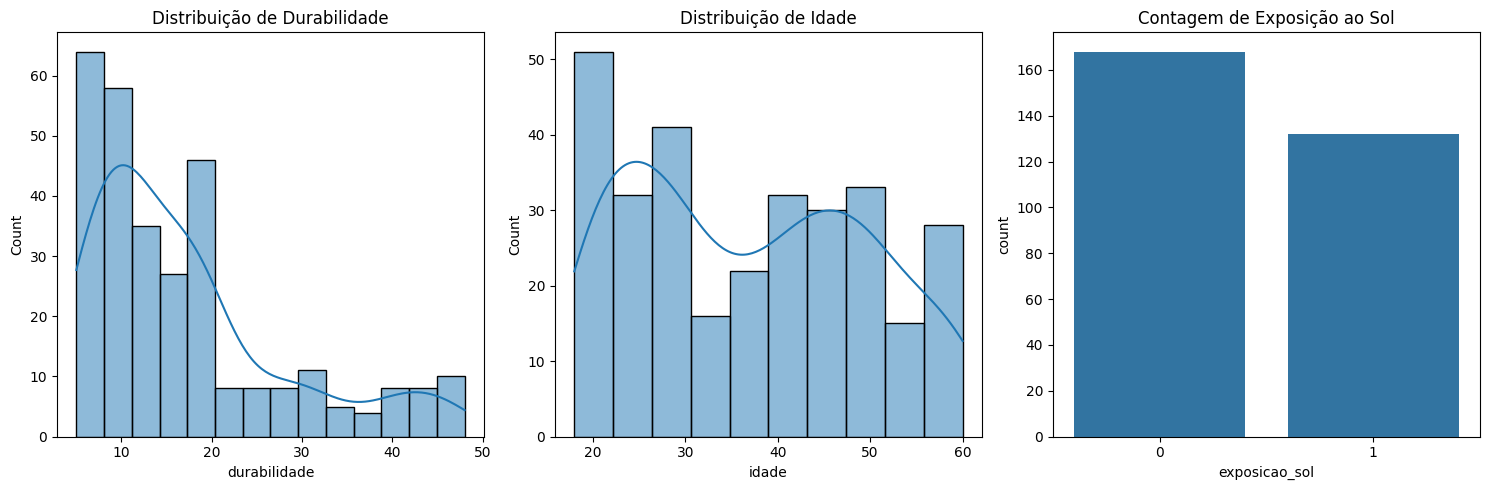

In [ ]:
import seaborn as sns

# Histogramas das variáveis contínuas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(cosmeticos_df['durabilidade'], kde=True)
plt.title('Distribuição de Durabilidade')

plt.subplot(1, 3, 2)
sns.histplot(cosmeticos_df['idade'], kde=True)
plt.title('Distribuição de Idade')

plt.subplot(1, 3, 3)
sns.countplot(data=cosmeticos_df, x='exposicao_sol')
plt.title('Contagem de Exposição ao Sol')


plt.tight_layout()
plt.show()




# Teste de Hipóteses

## 1 - Existe diferenca estatisticamente significativa na durabilidade dos batons com formulas diferentes?

 Médias de durabilidade para cada fórmula de batons e identificar qual delas tem a maior média.

In [ ]:

# com as colunas 'id_produto' e 'durabilidade'

# Calculando a média de durabilidade para cada fórmula
media_formula_1 = cosmeticos_df[cosmeticos_df['id_produto'] == 1]['durabilidade'].mean()
media_formula_2 = cosmeticos_df[cosmeticos_df['id_produto'] == 2]['durabilidade'].mean()
media_formula_3 = cosmeticos_df[cosmeticos_df['id_produto'] == 3]['durabilidade'].mean()

# Imprimindo as médias
print(f'Média de durabilidade da Fórmula 1: {media_formula_1}')
print(f'Média de durabilidade da Fórmula 2: {media_formula_2}')
print(f'Média de durabilidade da Fórmula 3: {media_formula_3}')


Média de durabilidade da Fórmula 1: 15.11
Média de durabilidade da Fórmula 2: 7.77
Média de durabilidade da Fórmula 3: 28.52


## Análise da Média

Com base nas médias de durabilidade calculadas:

Fórmula 1: 15.11 horas
Fórmula 2: 7.77 horas
Fórmula 3: 28.52 horas

**Análise:**
Fórmula 3 claramente se destaca com a maior durabilidade, quase o dobro da durabilidade da Fórmula 1. Fórmula 1 também apresenta uma durabilidade razoável, sendo a segunda melhor opção entre as fórmulas testadas. Fórmula 2 tem a menor durabilidade, indicando que pode não ser a melhor opção em termos de longevidade do produto.

Conclusão: **negrito**
Se a durabilidade é um fator crítico na escolha do batom, Fórmula 3 seria a escolha mais adequada devido à sua durabilidade significativamente maior. Fórmula 1 seria uma alternativa razoável se a Fórmula 3 não estiver disponível ou se outros fatores forem considerados importantes. Por outro lado, Fórmula 2 seria a menos recomendada em termos de durabilidade com base nos dados fornecidos.

Escolhi o teste ANOVA pois é  utilizado para verificar se existem diferenças estatisticamente significativas entre as médias de três ou mais grupos


In [ ]:
import scipy.stats as stats

In [ ]:
# Realizar o teste de ANOVA
f_stat, p_value = stats.f_oneway(
    cosmeticos_df[cosmeticos_df['id_produto'] == 1]['durabilidade'],
    cosmeticos_df[cosmeticos_df['id_produto'] == 2]['durabilidade'],
    cosmeticos_df[cosmeticos_df['id_produto'] == 3]['durabilidade']
)

# Imprimir os resultados
print(f"Valor F: {f_stat}")
print(f"Valor p: {p_value}")

# Conclusão do teste
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula. Há diferença estatisticamente significativa na durabilidade dos batons com fórmulas diferentes.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que há diferença na durabilidade dos batons com fórmulas diferentes.")

Valor F: 240.6680561187368
Valor p: 7.345246616757137e-63
Rejeitamos a hipótese nula. Há diferença estatisticamente significativa na durabilidade dos batons com fórmulas diferentes.


## Análise de resultado
Analisando os resultados do teste ANOVA que realizamos para comparar a durabilidade dos batons com diferentes fórmulas, temos resultados bastante interessantes.

**Valor F**: 240.67
Este é um indicador-chave do teste ANOVA. Um Valor F significativamente alto sugere que as variações entre os grupos (diferentes fórmulas de batom) são muito maiores do que as variações dentro dos grupos. Isso nos leva a crer que pelo menos duas das fórmulas de batom têm durabilidades diferentes.

**Valor p:** 7.35e-63
O Valor p é extremamente baixo, praticamente zero. Esse valor nos ajuda a entender a probabilidade de obter um resultado tão extremo quanto o que encontramos, assumindo que não haja diferença real entre as fórmulas. Neste contexto, é como se estivéssemos dizendo que a chance de todas as fórmulas de batom terem a mesma durabilidade é quase nula.

**Conclusão:**
Com base nos resultados do teste ANOVA, rejeitamos a hipótese nula. Isso significa que há diferença estatisticamente significativa na durabilidade dos batons com as diferentes fórmulas. Em termos simples, algumas fórmulas de batom duram mais do que outras. Portanto, ao desenvolver um batom de longa duração, é essencial considerar as fórmulas dos produtos!

# 2 - Essa diferenca persiste ou nao quando a voluntária se expoe ao sol? E com relaçao a idade

In [ ]:
import statsmodels.api as sm

# Adicionar uma coluna para a interação entre 'exposicao_sol' e 'id_produto'
cosmeticos_df['exposicao_sol_id_produto'] = cosmeticos_df['exposicao_sol'] * cosmeticos_df['id_produto']

# Adicionar uma constante para o modelo de regressão
cosmeticos_df['constante'] = 1

# Ajustar o modelo de regressão incluindo interações
modelo = sm.OLS(cosmeticos_df['durabilidade'],
                cosmeticos_df[['constante', 'exposicao_sol', 'id_produto', 'exposicao_sol_id_produto']]
               ).fit()

# Imprimir um resumo do modelo
print(modelo.summary())


# Verificar se o coeficiente de interação entre exposicao_sol e id_produto é significativo
if modelo.pvalues['exposicao_sol_id_produto'] < 0.05:
    # Se o coeficiente de interação for significativo
    if modelo.params['exposicao_sol_id_produto'] > 0:
        print("A relação entre exposição ao sol e durabilidade dos produtos é significativa e positiva.")
    else:
        print("A relação entre exposição ao sol e durabilidade dos produtos é significativa e negativa.")
else:
    # Se o coeficiente de interação não for significativo
    print("Não há evidências suficientes para concluir que a relação entre exposição ao sol e durabilidade dos produtos varia dependendo do tipo de produto.")


                            OLS Regression Results                            
Dep. Variable:           durabilidade   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     62.65
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           2.17e-31
Time:                        21:32:46   Log-Likelihood:                -1069.2
No. Observations:                 300   AIC:                             2146.
Df Residuals:                     296   BIC:                             2161.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
constante               

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Especificar o modelo ANOVA com interação
modelo = ols('durabilidade ~ C(id_produto) * idade', data=cosmeticos_df).fit()

# Realizar a ANOVA com interação
anova_resultado = sm.stats.anova_lm(modelo, typ=2)

# Exibir a tabela ANOVA
print(anova_resultado)

# Definir o nível de significância
alpha = 0.05

# Comparar o valor-p com o nível de significância

if anova_resultado['PR(>F)']['C(id_produto):idade'] < alpha:
    print("A interação entre tipo de batom e idade é estatisticamente significativa.")
else:
    print("A interação entre tipo de batom e idade não é estatisticamente significativa.")


                           sum_sq     df           F        PR(>F)
C(id_produto)        19164.960432    2.0  424.053518  2.312900e-87
idade                 1550.471682    1.0   68.613027  4.282697e-15
C(id_produto):idade   5468.371270    2.0  120.995923  4.579359e-39
Residual              6643.617048  294.0         NaN           NaN
A interação entre tipo de batom e idade é estatisticamente significativa.


## Análise de resultado
Analisando os resultados do teste de regressão linear que realizamos para  comparar a durabilidade dos batons com diferentes fórmulas,quando as voluntarias são expostas ao sol,É possivel afirmar  a que há uma associação estatisticamente significativa entre a exposição ao sol e a durabilidade dos produtos, e essa associação tem uma direção negativa.Isto é em média, a durabilidade dos produtos tende a diminuir quando há exposição ao sol.

Já em relação a idade:
A interação entre o tipo de batom e a idade é estatisticamente significativa,pois o PR> F da coluna C(id_produto:idade) é maior que o nivel de significancia escolhido(0.05).O que indica que as diferenças na durabilidade dos batons entre as diferentes fórmulas variam de acordo com a idade das voluntárias.


# 3- Qual fórmula de batom voce indicaria para consumidores que buscam maior durabilidade e exposicao ao sol?

In [ ]:
medias_durabilidade = cosmeticos_df.groupby(['id_produto', 'exposicao_sol'])['durabilidade'].mean().unstack()
print(medias_durabilidade)

exposicao_sol          0          1
id_produto                         
1              17.727273  11.911111
2               7.961538   7.562500
3              33.901639  20.102564


<Figure size 1000x600 with 0 Axes>

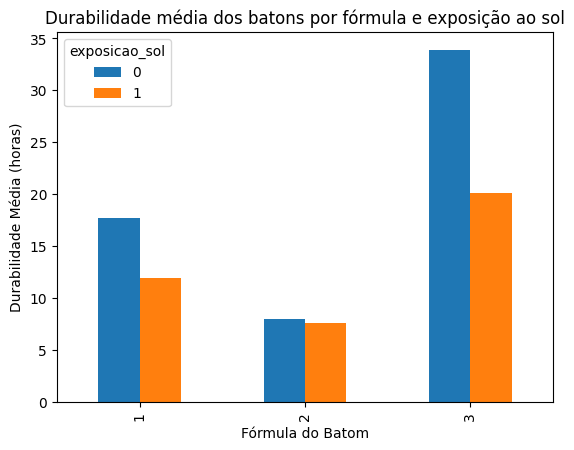

In [ ]:
plt.figure(figsize=(10, 6))
medias_durabilidade.plot(kind='bar')
plt.xlabel('Fórmula do Batom')
plt.ylabel('Durabilidade Média (horas)')
plt.title('Durabilidade média dos batons por fórmula e exposição ao sol')
plt.show()

#DESAFIO 2

Imagine que voce trabalha em uma empresa do setor alimentício, e o preço de determinado produto, um novo picolé, tem uma distribuição normal com média igual a RS 7,85 e desvio padrão igual a R$3,32. Suspeita-se que devido ao verão, em determinadas localidades de praia o preco do picolé esteja mais caro.

Para verificar se esse efeito é estatisticamente significativo, contactaram voce, analista de dados.

Suponha que para realizar essa análise voce tenha dados de 45 lojas em cidades do litoral, escolhidas aleatoriamente. E constatou que o preço médio do picolé nessas cidades é de R$11,52.

## 1. Voce pode concluir que existe diferenca de precos estatisticamente relevante com 5% de significancia?

H0 - não tem diferença significativa\
H1 - tem diferença significativa

alpha = 0.05

In [ ]:
# Preços médios e desvios padrão fora do verão
media_regular = 7.85
desvio = 3.32

# Pesquisa com lojas no verão
n = 45
media_verao = 11.52

In [ ]:
#cálculo do teste z já que sabemos média, desvio e tem mais de 30 amostras
teste_z = (media_verao - media_regular) / (desvio / np.sqrt(n))

print('Teste Z: ', teste_z)

Teste Z:  7.415394106106231


In [ ]:
#calculando valor crítico da distribuição normal
alpha = 0.05

valor_critico = norm.ppf(1 - alpha)

#comparando o teste Z com o valor crítico
if teste_z > valor_critico:
  print('Rejeitamos a hipótese nula')
else:
  print('Não rejeitamos a hipótese nula')

Rejeitamos a hipótese nula


# 1. Voce pode concluir que existe diferenca de precos estatisticamente relevante com 5% de significancia?

In [ ]:
picole_novo = 7.85
picole_verao = 11.52
std = 3.32
amostra = 45
alpha = 0.05

In [ ]:
z_test = (picole_verao-picole_novo)/(std/np.sqrt(amostra))
print('Teste Z :',z_test)

Teste Z : 7.415394106106231


In [ ]:
p_value = 1-norm.cdf(z_test)
print('p-value :',p_value)

p-value : 6.061817714453355e-14


In [ ]:
if p_value <  alpha:
    print("Rejeitar Hipótese Nula!")
else:
  print("Aceitar Hipótese Nula!")

Rejeitar Hipótese Nula!


**com base  Picoles estão mais caros durante o verão outras localidades!**

## 2. Qual o valor da variável teste, o intervalo de confianca e o p-valor?

In [ ]:
#cálculo do intervalo de confiança
ic_min, ic_max = norm.interval(0.95, loc = media_regular,
                          scale = desvio / (n ** 0.5))

#fórmula para p-valor
p_valor = 1 - norm.cdf(teste_z)

In [ ]:
print('Teste Z: ', teste_z)
print('Valor crítico: ', valor_critico)
print('Intervalo de confiança mínimo: {0} e máximo {1}'.format(ic_min, ic_max))
print('P-valor: ', p_valor)

Teste Z:  7.415394106106231
Valor crítico:  1.6448536269514722
Intervalo de confiança mínimo: 6.879981721761916 e máximo 8.820018278238082
P-valor:  6.061817714453355e-14
